<!--  Here is the little programming project. 

    Pricing option using simulation

    There are ten non-Dividend paying stocks following GBM with no drift term (zero interest rate) and 30% annualized volatility and each of them is worth $100 currently.
    Correlations between each pair of stocks are defined as (0.9)^abs(i – j), where i and j are the stock numbering.
    We are interested in the price of at the money European basket call option whose payoff is max(avg(S1,…S10)-100,0) and maturity date is in one year.
    If we sell this option at the market now but receive the premium at the maturity date, what would be the total loss that will not be exceeded at 95% confidence level in one year?
    It can be done in either Python or Matlab.

    Bonus question

    Reduce the size of the above correlation matrix to 3x3 using the principle component analysis or similar method
    Repeat the calculation for c) and d) and compare the results and computation time with 50,000 simulation repetitions -->

#### Here is the little programming project. 
######  1.	Pricing option using simulation
a.	There are ten non-Dividend paying stocks following GBM with no drift term (zero interest rate) and 30% annualized volatility and each of them is worth $100 currently.

b.	Correlations between each pair of stocks are defined as (0.9)^abs(i – j), where i and j are the stock numbering.

c.	We are interested in the price of at the money European basket call option whose payoff is max(avg(S1,…S10)-100,0) and maturity date is in one year.

d.	If we sell this option at the market now but receive the premium at the maturity date, what would be the total loss that will not be exceeded at 95% confidence level in one year?

e.	It can be done in either Python or Matlab.

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
%pprint

Pretty printing has been turned OFF


In [2]:
s0 = 100 # intial stock price
sig_annual = 0.3 # annual volatility
q_ = 0 # Dividends paid by the stock
drift_ = 0 # Drift of the GBM
T_ = 1 # Time to maturity in years
stocks_ = 10 # Number of Stocks
no_simulations = 50000 # Number of simulations required
interest_rate = 0 # Interest rates
random_seed = 100 # Random seed

###### a.	There are ten non-Dividend paying stocks following GBM with no drift term (zero interest rate) and 30% annualized volatility and each of them is worth $100 currently.

In [3]:
def stock_price(z): # Here z is standard normal random variable
    return s0*np.exp( (drift_-q_-((sig_annual**2)/2))*T_ + (sig_annual*np.sqrt(T_)*z) ) 

###### b.	Correlations between each pair of stocks are defined as (0.9)^abs(i – j), where i and j are the stock numbering.

In [4]:
# Generating the correlation matrix where correlation = 0.9^abs(i-j)
corr_matrix = pd.DataFrame(np.array([[0.9**abs(i-j) for j in range(stocks_)] for i in range(stocks_)]))

In [5]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.900000,0.810000,0.729000,0.65610,0.59049,0.531441,0.478297,0.430467,0.387420
1,0.900000,1.000000,0.900000,0.810000,0.72900,0.65610,0.590490,0.531441,0.478297,0.430467
2,0.810000,0.900000,1.000000,0.900000,0.81000,0.72900,0.656100,0.590490,0.531441,0.478297
3,0.729000,0.810000,0.900000,1.000000,0.90000,0.81000,0.729000,0.656100,0.590490,0.531441
4,0.656100,0.729000,0.810000,0.900000,1.00000,0.90000,0.810000,0.729000,0.656100,0.590490
5,0.590490,0.656100,0.729000,0.810000,0.90000,1.00000,0.900000,0.810000,0.729000,0.656100
6,0.531441,0.590490,0.656100,0.729000,0.81000,0.90000,1.000000,0.900000,0.810000,0.729000
7,0.478297,0.531441,0.590490,0.656100,0.72900,0.81000,0.900000,1.000000,0.900000,0.810000
8,0.430467,0.478297,0.531441,0.590490,0.65610,0.72900,0.810000,0.900000,1.000000,0.900000
9,0.387420,0.430467,0.478297,0.531441,0.59049,0.65610,0.729000,0.810000,0.900000,1.000000


In [6]:
# Using numpy to generate the Lower Triangular matrix of corr_matrix
cholesky_ = pd.DataFrame(np.linalg.cholesky(corr_matrix)) 

In [7]:
cholesky_

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.900000,0.435890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.810000,0.392301,0.435890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.729000,0.353071,0.392301,0.435890,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.656100,0.317764,0.353071,0.392301,0.435890,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.590490,0.285987,0.317764,0.353071,0.392301,0.435890,0.000000,0.000000,0.000000,0.00000
6,0.531441,0.257389,0.285987,0.317764,0.353071,0.392301,0.435890,0.000000,0.000000,0.00000
7,0.478297,0.231650,0.257389,0.285987,0.317764,0.353071,0.392301,0.435890,0.000000,0.00000
8,0.430467,0.208485,0.231650,0.257389,0.285987,0.317764,0.353071,0.392301,0.435890,0.00000
9,0.387420,0.187636,0.208485,0.231650,0.257389,0.285987,0.317764,0.353071,0.392301,0.43589


In [8]:
## Matrix A = LLt (where L = Cholesky decomposition, Lt is L transpose)

# We can verify this by below statement. Differences are almost zero (ignoring the rounding errors)

corr_matrix - cholesky_.dot(cholesky_.T)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.551115e-17
3,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.0,0.0,0.000000e+00,0.0,-2.220446e-16,0.000000e+00,1.110223e-16,0.000000e+00,1.110223e-16,0.000000e+00
5,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.110223e-16,1.110223e-16,0.000000e+00,0.000000e+00
6,0.0,0.0,0.000000e+00,0.0,1.110223e-16,-1.110223e-16,1.110223e-16,-1.110223e-16,0.000000e+00,0.000000e+00
7,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.110223e-16,-1.110223e-16,-2.220446e-16,-1.110223e-16,-1.110223e-16
8,0.0,0.0,0.000000e+00,0.0,1.110223e-16,0.000000e+00,0.000000e+00,-1.110223e-16,-2.220446e-16,0.000000e+00
9,0.0,0.0,-5.551115e-17,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.110223e-16,0.000000e+00,0.000000e+00


In [9]:
np.random.seed(random_seed)
normal_rv = pd.DataFrame(np.random.normal(0, 1, size=(stocks_, no_simulations))) # Generating Normal Randome variables for all the 10 stocks (50,000 simulations for each stock)

In [10]:
normal_rv # These are standard normal random variables

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,-1.749765,0.342680,1.153036,-0.252436,0.981321,0.514219,0.221180,-1.070043,-0.189496,0.255001,...,-0.140612,0.084242,1.161158,0.310952,-1.041914,0.866815,-0.965947,0.945321,-0.144223,-0.396425
1,0.862797,-0.139946,-0.160616,0.418031,-0.227691,-0.679516,-0.099549,-0.521944,0.333522,-0.314779,...,0.515713,0.548659,-0.427595,-0.214962,0.793008,-1.257805,-0.270379,-1.966830,0.539613,0.516881
2,0.880152,0.928877,-0.267774,-0.268280,0.952740,1.732044,-0.138572,1.438937,-0.721975,0.631990,...,-0.166987,1.079130,-0.044405,1.533476,2.129767,-0.410435,-0.480363,-0.497722,0.713139,-0.301669
3,-0.944056,1.067048,-1.540320,1.346524,0.595154,-1.371947,-0.134834,0.951918,0.353293,-0.239067,...,1.051500,-0.384789,-1.579136,-0.860402,0.145474,-1.089157,-0.893935,0.847752,-0.726215,0.826301
4,1.407340,1.282340,-1.833029,0.835859,0.175524,1.678120,-0.470431,0.127999,-0.129849,-1.885285,...,0.126691,3.275802,-1.866515,-0.828312,0.387683,0.877607,0.420845,-0.715219,-0.707786,1.115239
5,0.704305,1.123758,-1.721291,0.580337,-1.393896,-0.924104,0.461763,0.359716,0.080323,0.724048,...,-0.025943,-0.563179,-0.305474,-1.990335,-0.280523,1.081267,-0.530527,0.628741,0.617462,0.308941
6,0.751539,-0.565317,1.607861,-0.037788,-0.802742,-1.495377,-0.094805,1.334273,-2.518096,0.220193,...,-0.967720,0.942398,1.475730,-1.946577,-0.938857,1.294267,-0.201377,-1.218530,-1.084889,0.087268
7,1.650551,-1.049672,-0.789564,-0.096709,-0.363067,0.167654,1.533650,-0.912087,-0.132692,1.563007,...,1.275272,-0.466324,1.057696,-0.954327,-0.030103,0.439430,-0.830328,1.668456,2.133218,-0.672247
8,0.930570,2.148757,1.534406,-1.546249,0.129558,1.620856,-0.172359,-0.478415,-0.354699,-1.495312,...,-0.751007,0.554518,-1.447449,-1.152016,-1.754380,0.357150,0.522616,-1.034895,0.211280,0.751929
9,0.410658,-0.236840,-1.126662,-0.847018,-0.610456,-0.193259,-1.631738,0.984655,0.412392,-0.853467,...,-0.360118,-1.130478,0.403404,-0.906569,1.302229,1.306713,-1.237751,-1.461239,0.402756,-1.043496


In [11]:
correlated_stocks = cholesky_.dot(normal_rv).copy() # These are normal random variables correlated with each other with value = 0.9^abs(i-j)

corr_dict = {}
for i in range(stocks_):
    for j in range(i,stocks_):
        corr_dict['{}-{}'.format(i,j)] = round(correlated_stocks.iloc[i].corr(correlated_stocks.iloc[j]),3)
        

In [12]:
correlated_stocks

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,-1.749765,0.342680,1.153036,-0.252436,0.981321,0.514219,0.221180,-1.070043,-0.189496,0.255001,...,-0.140612,0.084242,1.161158,0.310952,-1.041914,0.866815,-0.965947,0.945321,-0.144223,-0.396425
1,-1.198704,0.247411,0.967721,-0.044977,0.783941,0.166603,0.155669,-1.190549,-0.025167,0.092292,...,0.098243,0.314973,0.858658,0.186157,-0.592059,0.231869,-0.987208,-0.006532,0.105411,-0.131479
2,-0.695185,0.627558,0.754229,-0.157420,1.120836,0.904923,0.079700,-0.444276,-0.337352,0.358541,...,0.015631,0.753857,0.753436,0.835968,0.395491,0.029778,-1.097872,-0.222831,0.405720,-0.249826
3,-1.037170,1.029918,0.007396,0.445259,1.268174,0.216413,0.012958,0.015083,-0.149620,0.218480,...,0.472406,0.510746,-0.010237,0.377330,0.419353,-0.447953,-1.377742,0.168978,0.048598,0.135333
4,-0.320008,1.485885,-0.792342,0.765075,1.217866,0.926247,-0.193394,0.069368,-0.191258,-0.625145,...,0.480389,1.887560,-0.822808,-0.021455,0.546405,-0.020618,-1.056526,-0.159677,-0.264778,0.607922
5,0.018992,1.827131,-1.463401,0.941531,0.488494,0.430815,0.027223,0.219228,-0.137120,-0.247025,...,0.421042,1.453320,-0.873681,-0.886877,0.369487,0.452757,-1.182124,0.130353,0.030845,0.681794
6,0.344681,1.398002,-0.616211,0.830906,0.089738,-0.264086,-0.016824,0.778901,-1.221021,-0.126342,...,-0.042882,1.718770,-0.143057,-1.646683,-0.076700,0.971640,-1.151690,-0.413827,-0.445131,0.651653
7,1.029672,0.800661,-0.898753,0.705661,-0.077493,-0.164599,0.653361,0.303442,-1.156758,0.567591,...,0.517284,1.343627,0.332288,-1.897996,-0.082152,1.066019,-1.398453,0.354818,0.529230,0.293463
8,1.332331,1.657216,-0.140045,-0.038899,-0.013271,0.558376,0.512895,0.064561,-1.195692,-0.140960,...,0.138200,1.450973,-0.331869,-2.210348,-0.838653,1.115095,-1.030804,-0.131764,0.568402,0.591875
9,1.378099,1.388258,-0.617141,-0.404215,-0.278036,0.418298,-0.249652,0.487306,-0.896365,-0.498882,...,-0.032592,0.813112,-0.122843,-2.384478,-0.187159,1.573169,-1.467247,-0.755527,0.687119,0.077838


In [13]:
corr_dict # We can see that the correlation of the stocks is as per our expectation of 0.9^abs(i-j) in this dictionary

{'0-0': 1.0, '0-1': 0.9, '0-2': 0.808, '0-3': 0.728, '0-4': 0.657, '0-5': 0.588, '0-6': 0.53, '0-7': 0.477, '0-8': 0.429, '0-9': 0.388, '1-1': 1.0, '1-2': 0.898, '1-3': 0.807, '1-4': 0.727, '1-5': 0.653, '1-6': 0.588, '1-7': 0.528, '1-8': 0.475, '1-9': 0.429, '2-2': 1.0, '2-3': 0.899, '2-4': 0.81, '2-5': 0.727, '2-6': 0.654, '2-7': 0.589, '2-8': 0.53, '2-9': 0.477, '3-3': 1.0, '3-4': 0.901, '3-5': 0.809, '3-6': 0.727, '3-7': 0.653, '3-8': 0.588, '3-9': 0.53, '4-4': 1.0, '4-5': 0.899, '4-6': 0.807, '4-7': 0.726, '4-8': 0.653, '4-9': 0.588, '5-5': 1.0, '5-6': 0.899, '5-7': 0.807, '5-8': 0.727, '5-9': 0.654, '6-6': 1.0, '6-7': 0.899, '6-8': 0.809, '6-9': 0.727, '7-7': 1.0, '7-8': 0.9, '7-9': 0.809, '8-8': 1.0, '8-9': 0.899, '9-9': 1.0}

In [14]:
simulated_stock_price = stock_price(correlated_stocks) # Fetching the GBM stock price at T=1 for each random variable

In [15]:
simulated_stock_price

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,56.556523,105.950744,135.108874,88.627250,128.325040,111.545864,102.158353,69.349379,90.316615,103.200182,...,91.650869,98.046591,135.438488,104.947028,69.937074,123.991714,71.549264,126.946591,91.551653,84.880355
1,66.723609,102.965459,127.802566,94.318476,120.946988,100.499325,100.170226,66.887057,94.880665,98.283666,...,98.459275,105.073693,123.688647,101.090609,80.042083,102.486488,71.094354,95.412583,98.671249,91.902337
2,77.603678,115.403847,119.873730,91.189915,133.810025,125.417361,97.913090,83.670571,86.397997,106.456085,...,96.049086,119.860344,119.845217,122.849559,107.642712,96.457601,68.772813,89.417891,107.973546,88.696685
3,70.036675,130.209621,95.812105,109.261907,139.857287,102.012363,95.972093,96.033302,91.403530,102.075648,...,110.155386,111.429698,95.306608,107.057843,108.416038,83.578340,63.234341,100.570972,97.003756,99.560970
4,86.848723,149.296722,75.374389,120.264415,137.762342,126.222265,90.211051,97.610063,90.268875,79.251537,...,110.419502,168.416194,74.688617,94.986385,112.628139,95.010265,69.631181,91.128193,88.299706,114.726002
5,96.145997,165.390541,61.630068,126.802328,110.688340,108.789488,96.383696,102.098554,91.746934,88.771241,...,108.470978,147.845270,73.557397,73.266766,106.806239,109.507980,67.056322,99.412320,96.488498,117.296894
6,106.014360,145.411975,79.464228,122.663164,98.208379,88.318039,95.118450,120.764286,66.278393,92.044067,...,94.377771,160.100409,91.583689,58.332850,93.425113,127.952886,67.671370,84.438373,83.649114,116.241069
7,130.199994,121.555192,73.006203,118.139795,93.402881,90.993722,116.300625,104.710847,67.568568,113.346263,...,111.648491,143.059175,105.620928,54.096605,93.272444,131.627487,62.842677,106.337253,112.049323,104.397838
8,142.575171,157.171105,91.666464,94.490613,95.219895,113.033347,111.501585,97.469415,66.783942,91.641319,...,99.646613,147.741213,86.540229,49.257701,74.334436,133.579763,70.170564,91.894486,113.373844,114.175022
9,144.546322,144.987522,79.442044,84.682210,87.949211,108.381744,88.701294,110.648895,73.058511,82.311080,...,94.669562,122.010104,92.140756,46.750588,90.379954,153.257691,61.559004,76.211481,117.484433,97.858392


###### c. We are interested in the price of at the money European basket call option whose payoff is max(avg(S1,…S10)-100,0) and maturity date is in one year.

In [16]:
start_time = time.perf_counter() # Starting the Time counter

In [17]:
#euro_call_payoff_list = [max(np.mean(simulated_stock_price.iloc[:,p])-s0,0) for p in range(simulated_stock_price.shape[1])]
euro_call_payoff_list = [max(test-s0,0) for test in list(simulated_stock_price.mean())]

# Calculating the price using the discounted payoff
euro_call_price = np.exp(-interest_rate*T_)*np.mean(euro_call_payoff_list)

In [18]:
euro_call_price

10.162439549554605

#### d. If we sell this option at the market now but receive the premium at the maturity date, what would be the total loss that will not be exceeded at 95% confidence level in one year?

In [19]:
# Since we will be getting the premium money after one year, all cashflow will happen at T=1

cash_inflow = euro_call_price # This is the cashflow because of selling the call option
cash_outflow_list = euro_call_payoff_list # This is the cashflow at the expiry of the call option

In [20]:
total_loss_list = cash_inflow - cash_outflow_list # Loss = Inflow - Outflow

In [21]:
total_loss_list

array([ 10.16243955, -23.67183342,  10.16243955, ...,  10.16243955,
         9.5079272 ,   7.18888315])

In [22]:
var_95 = -np.percentile(total_loss_list,5) # Maximum loss at 95% Confidence level in one year

In [23]:
var_95

37.23596753705189

In [24]:
end_time = time.perf_counter() # Ending the Time Counter
elapsed_time_part1 = end_time - start_time # Total Time required for part c and d with 10x10 correlation matrix

In [25]:
print("Time required for steps C and D with 10x10 correaltion matrix is {} seconds".format(elapsed_time_part1))

Time required for steps C and D with 10x10 correaltion matrix is 0.2048943999999997 seconds


## Bonus question

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

In [27]:
# These are stock returns for each stock price because each data point in the simulated_stock_price is the 
## price at T=1 and we know that initial price = 100 for each of them
stock_returns1 = (simulated_stock_price-100)/100 

In [28]:
pca = PCA(n_components=3) # We are using 3 Components here to get 3x3 matrix
pca_stock_returns1 = pd.DataFrame(pca.fit_transform(stock_returns1.T)).copy()

In [29]:
## Correlation matrix (In this case, as we are using PCA, we will get identity matrix as off diagonal elements 
## are orthogonal to each other)

pca_stock_returns1.corr()

,0,1,2
0,1.000000e+00,3.645520e-16,2.256739e-16
1,3.645520e-16,1.000000e+00,-1.970884e-16
2,2.256739e-16,-1.970884e-16,1.000000e+00


In [30]:
start_time1 = time.perf_counter()

In [31]:
# We will use modified payoff function (as explained in the attached PDF)

payoff_pca1 = [max(test,0) for test in list(pca_stock_returns1.mean(axis=1)*100)]

In [32]:
euro_call_price_pca1 = np.exp(-drift_*T_)*np.mean(payoff_pca1)

In [33]:
euro_call_price_pca1

12.029933703955908

In [34]:
### ***** Calculating the VaR with 95% Confidence Interval ****#
# Since we will be getting the premium money after one year, all cashflow will happen at T=1

cash_inflow1 = euro_call_price_pca1
cash_outflow_list1 = payoff_pca1

total_loss_list1 = cash_inflow1 - cash_outflow_list1

var_95_pca1 = -np.percentile(total_loss_list1,5) # Maximum loss at 95% Confidence level in one year

In [35]:
var_95_pca1

44.930552580496

In [36]:
end_time1 = time.perf_counter() # Ending the Time Counter
elapsed_time_part1 = end_time1 - start_time1 # Total Time required for part c and d with 10x10 correlation matrix

print("Time required for steps C and D with 3 PCA components using return matrix is {} seconds".format(elapsed_time_part1))

Time required for steps C and D with 3 PCA components using return matrix is 0.15787949999999995 seconds


In [37]:
sum(pca.explained_variance_)

0.8588491423643309

# Alternative Methods for Bonus Question

#### Method 1: Grouping by Correlation (by visual inspection)

###### We will convert 10 stocks to effectively 3 stocks

<AxesSubplot:>

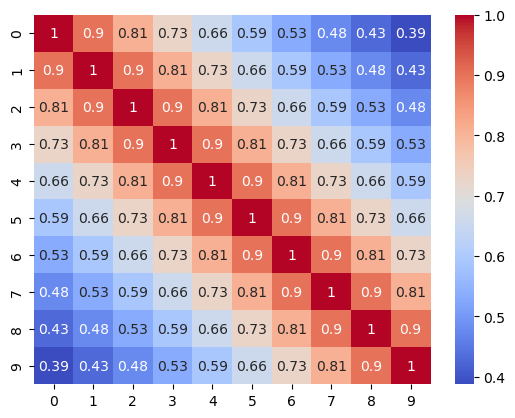

In [38]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [39]:
start_time2 = time.perf_counter()

In [40]:
## Objective here is to cover entire range of correlation given by stocks
## We can see that stocks 5 and 6 are on an average highly correlated to other stocks
## Stocks 1,10 are relatively less correlated to other stocks
## Stocks 3, 8 are moderately correlated to other stocks
## We can create three buckets of these stocks
### This is analogous to creating 3 factors

bucket_1 = pd.DataFrame(simulated_stock_price.T.loc[:,[4,5]].mean(axis=1),columns=['bucket_1'])
bucket_2 = pd.DataFrame(simulated_stock_price.T.loc[:,[0,9]].mean(axis=1),columns=['bucket_2'])
bucket_3 = pd.DataFrame(simulated_stock_price.T.loc[:,[2,7]].mean(axis=1),columns=['bucket_3'])
buckets_ = pd.concat([bucket_1,bucket_2,bucket_3], axis=1)

In [41]:
##### As defined by the correlation function, we can divide stocks into three categories
### Low Avg Correlation (Bucket 1): Stocks 0,1,8,9
### Medium Avg Correlation (Bucket 2): Stocks 2,3,6,7
### High Avg Correlation (Bucket 3): Stocks 4,5

#euro_call_payoff_list = [max(np.mean(simulated_stock_price.iloc[:,p])-s0,0) for p in range(simulated_stock_price.shape[1])]
euro_call_payoff_list_bucket = [max(test-s0,0) for test in list(buckets_.mean(axis=1))]

# Calculating the price using the discounted payoff
euro_call_price_bucket = np.exp(-interest_rate*T_)*np.mean(euro_call_payoff_list_bucket)

In [42]:
# Since we will be getting the premium money after one year, all cashflow will happen at T=1

cash_inflow_bucket = euro_call_price_bucket # This is the cashflow because of selling the call option
cash_outflow_list_bucket = euro_call_payoff_list_bucket # This is the cashflow at the expiry of the call option

In [43]:
total_loss_list_bucket = cash_inflow_bucket - cash_outflow_list_bucket # Loss = Inflow - Outflow

var_95_bucket = -np.percentile(total_loss_list_bucket,5) # Maximum loss at 95% Confidence level in one year

In [44]:
end_time2 = time.perf_counter() # Ending the Time Counter

elapsed_time_part2 = end_time2 - start_time2 # Total Time required for part c and d with 3 factors based on avg correlation

print("Time required for steps C and D with 3 factors is {} seconds".format(elapsed_time_part2))

Time required for steps C and D with 3 factors is 0.17353040000000064 seconds


In [45]:
## As expected, these buckets give similar option price to the first question
## There is small difference because we have not selected the entire population
euro_call_price - euro_call_price_bucket

0.0232055373902611

In [46]:
## As expected, these buckets give similar VaR to the first question
var_95 - var_95_bucket

0.3930793530222445

#### Method 2: Using PCA (but with different use case)

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# These are stock returns for each stock price because each data point in the simulated_stock_price is the 
## price at T=1 and we know that initial price = 100 for each of them
stock_returns1 = (simulated_stock_price-100)/100 

In [49]:
start_time3 = time.perf_counter()

###### PCA using 3 Principal Components

In [50]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(stock_returns1.T)

# Apply PCA
pca_3 = PCA(n_components=3)
Y = pca_3.fit_transform(X)

# Now you can use inverse_transform to get back the standardized original variables
X_recovered = pca_3.inverse_transform(Y)

# To get the original (non-standardized) variables, "unstandardize" the data
X_orig_recovered = scaler.inverse_transform(X_recovered)

X_orig_recovered = pd.DataFrame(X_orig_recovered).copy()
X_orig_recovered_stock = 100*(1+X_orig_recovered)

euro_call_payoff_list_method2 = [max(test-s0,0) for test in list(X_orig_recovered_stock.T.mean())]
euro_call_price_method2 = np.exp(-interest_rate*T_)*np.mean(euro_call_payoff_list_method2)

# Since we will be getting the premium money after one year, all cashflow will happen at T=1

cash_inflow_method2 = euro_call_price_method2 # This is the cashflow because of selling the call option
cash_outflow_list_method2 = euro_call_payoff_list_method2 # This is the cashflow at the expiry of the call option

total_loss_list_method2 = cash_inflow_method2 - cash_outflow_list_method2 # Loss = Inflow - Outflow
var_95_method2 = -np.percentile(total_loss_list_method2,5) # Maximum loss at 95% Confidence level in one year

In [51]:
end_time3 = time.perf_counter() # Ending the Time Counter

elapsed_time_part3 = end_time3 - start_time3 # Total Time required for part c and d with 3 components in PCA

print("Time required for steps C and D using 3 principal components in PCA is {} seconds".format(elapsed_time_part3))

Time required for steps C and D using 3 principal components in PCA is 0.18880380000000052 seconds


In [52]:
sum(pca_3.explained_variance_ratio_) # This is the total variance explained by 3 Principal Components

0.9205108109830702

In [53]:
euro_call_price_method2

10.162178448219274

In [54]:
var_95_method2

37.22926849598724

###### As can be seen from the results, using 3 Principal components capture 92% variance and give results close to the actual values

###### We can check below, how increasing the number of components improves our final results

In [55]:
n_components, option_price,var_pca, option_price_delta, var_delta = [], [], [], [] , []

def pca_with_inverse(n):
    

    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    import numpy as np


    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(stock_returns1.T)

    # Apply PCA
    pca2 = PCA(n_components=n)
    Y = pca2.fit_transform(X)

    # Now you can use inverse_transform to get back the standardized original variables
    X_recovered = pca2.inverse_transform(Y)

    # To get the original (non-standardized) variables, "unstandardize" the data
    X_orig_recovered = scaler.inverse_transform(X_recovered)
    
    X_orig_recovered = pd.DataFrame(X_orig_recovered).copy()
    X_orig_recovered_stock = 100*(1+X_orig_recovered)
    
    euro_call_payoff_list_method2 = [max(test-s0,0) for test in list(X_orig_recovered_stock.T.mean())]
    euro_call_price_method2 = np.exp(-interest_rate*T_)*np.mean(euro_call_payoff_list_method2)
    
    # Since we will be getting the premium money after one year, all cashflow will happen at T=1
    
    cash_inflow_method2 = euro_call_price_method2 # This is the cashflow because of selling the call option
    cash_outflow_list_method2 = euro_call_payoff_list_method2 # This is the cashflow at the expiry of the call option
    
    total_loss_list_method2 = cash_inflow_method2 - cash_outflow_list_method2 # Loss = Inflow - Outflow
    var_95_method2 = -np.percentile(total_loss_list_method2,5) # Maximum loss at 95% Confidence level in one year

    
    n_components.append(n)
    option_price.append(euro_call_price_method2)
    var_pca.append(var_95_method2)
    option_price_delta.append(euro_call_price-euro_call_price_method2)
    var_delta.append(var_95-var_95_method2)
    
    return


In [56]:
for m in range(2,11):
    pca_with_inverse(m)
    
option_price_delta = [float(format(x,'.10f')) for x in option_price_delta]  #Rounding numbers to decimal format  
var_delta = [float(format(x,'.10f')) for x in var_delta]  #Rounding numbers to decimal format  

In [57]:
cross_checking = pd.DataFrame({'n_components': n_components, 'option_price': option_price, 'var_95': var_pca, 'price_delta': option_price_delta, 'var_delta':var_delta})

###### Below results show that increasing number of components increases our accuracy, which is as expected

In [58]:
cross_checking

,n_components,option_price,var_95,price_delta,var_delta
0,2,10.158502,37.278711,0.003937,-0.042743
1,3,10.162178,37.229268,0.000261,0.006699
2,4,10.162178,37.229416,0.000261,0.006551
3,5,10.162404,37.210856,0.000036,0.025111
4,6,10.162404,37.210444,0.000035,0.025524
5,7,10.162431,37.243105,0.000009,-0.007137
6,8,10.162431,37.238519,0.000008,-0.002552
7,9,10.162438,37.236925,0.000001,-0.000958
8,10,10.162440,37.235968,0.000000,0.000000


###### Scree plot for PCA: Checking the explained Variance corresponding to varying number of components

In [59]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(stock_returns1.T)

# Apply PCA
pca2 = PCA(n_components=10)
Y = pca2.fit_transform(X)

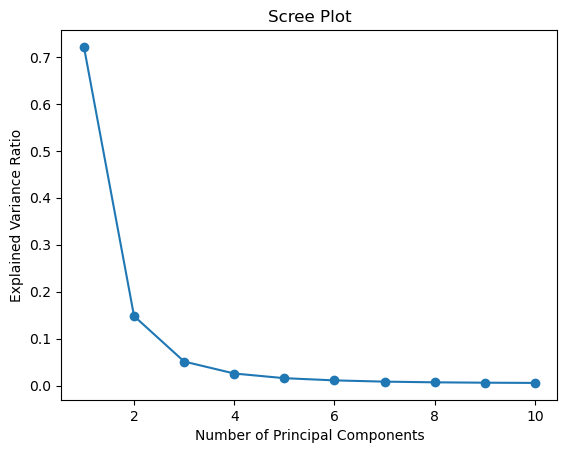

In [60]:
# Scree plot
explained_variance_ratio = pca2.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

###### We can see that beyond 3 components, there is no significant additional benefit of adding new components 